# <center>Đồ án 3: Linear Regression</center>

# Thông tin sinh viên

- Họ và tên: Nguyễn Tấn Lộc
- MSSV: 21127099
- Lớp: 21CLC5

# Import

In [301]:
import pandas as pd # PHÂN TÍCH DỮ LIỆU
import numpy as np # TÍNH TOÁN SỐ HỌC VÀ XỬ LÝ MẢNG NHIỀU CHIỀU
import matplotlib.pyplot as plt # TẠO BIỂU ĐỒ VÀ ĐỒ THỊ TRỰC QUAN
import seaborn as sns # TẠO BIỂU ĐỒ NHIỆT
from sklearn.ensemble import RandomForestRegressor # 1 MÔ HÌNH CÂU 1D - XÂY DỰNG MÔ HÌNH CHO BÀI TOÁN HỒI QUY(DỰ ĐOÁN GIÁ TRỊ)
# Import thêm dữ thư viện nếu cần

# Đọc dữ liệu

In [302]:
# Đọc dữ liệu bằng pandas
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Lấy các đặc trưng X và giá trị mục tiêu y cho các tập huấn luyện (train) và kiểm tra (test)
X_train = train.iloc[:, :-1]    # Dataframe (chứa các đặc trưng huấn luyện)
Y_train = train.iloc[:, -1]     # Series    (chứa 1 giá trị mục tiêu kiểm tra)

X_test = test.iloc[:, :-1]      # Dataframe (chứa các đặc trưng kiểm tra)
Y_test = test.iloc[:, -1]       # Series    (chứa 1 giá trị mục tiêu kiểm tra)
# Sinh viên có thể sử dụng các khác nếu cần

# Cài đặt hàm

In [303]:
# Cài đặt các hàm cần thiết ở đây
class OLSLinearRegression:
    def fit(self, X, y):
        X_pinv = np.linalg.inv(X.T @ X) @ X.T    # np.linalg.pinv(X)
        self.w = X_pinv @ y

        return self


    def get_params(self):
        return self.w


    def predict(self, X):
        return np.sum(self.w.ravel() * X, axis=1)   

def mae(y, y_hat):
    return np.mean(np.abs(y.ravel() - y_hat.ravel()))

In [304]:
# Hàm thực hiện k-fold Cross Validation
def k_fold_1(X, y, k):
    # Lấy fold size để chia dữ liệu
    src_size = X.shape[0]
    fold_size = src_size // k # 2248/k

    # Shuffle dữ liệu
    shuffle= np.random.RandomState(seed=21127099).permutation(src_size)

    mae_results = []

    for i in range(k):
        # Chia dữ liệu
        start = i * fold_size
        end = (i + 1) * fold_size
        if i == k - 1:
            end = src_size 
        # 449 49 449 449 452
        value_list = shuffle[start:end]
        train_concat = np.concatenate([shuffle[:start], shuffle[end:]])
        
        
        X_train_ = X[train_concat]
        Y_train_ = y[train_concat]
        X_value = X[value_list]
        Y_value = y[value_list]
        
        # Sử dụng mô hình OLSLinearRegression
        model = OLSLinearRegression()
        model.fit(X_train_, Y_train_)
        y_predict = model.predict(X_value)
        mae_results.append(mae(Y_value, y_predict))
    return np.mean(mae_results)

def k_fold_2(X, y, k):
    # Lấy fold size để chia dữ liệu
    fold_size = X.shape[0] // k # 2248/k
    # Shuffle dữ liệu
    shuffle= np.random.RandomState(seed=21127099).permutation(X.shape[0])
    mae_results = np.zeros((X.shape[1],k))

    for i in range(k):
        # Chia dữ liệu
        start = i * fold_size
        end = (i + 1) * fold_size
        if i == k - 1:
            end = X.shape[0]
        # 449 49 449 449 452
        value_list = shuffle[start:end]
        train_concat = np.concatenate([shuffle[:start], shuffle[end:]])
        for feature in range(X.shape[1]):
            X_train_ = X[train_concat][:,feature].reshape(-1,1)
            Y_train_ = y[train_concat]
            X_value = X[value_list][:,feature].reshape(-1,1)
            Y_value = y[value_list]
            model = OLSLinearRegression()
            model.fit(X_train_, Y_train_)
            y_predict = model.predict(X_value)
            mae_results[feature][i]=mae(Y_value, y_predict)

    return np.mean(mae_results,axis=1)

# Yêu cầu 1a: Sử dụng toàn bộ 11 đặc trưng đầu tiên `Gender`, `10percentage`, `12percentage`, `CollegeTier`, `Degree`, `collegeGPA`, `CollegeCityTier`, `English`, `Logical`, `Quant`, `Domain` (2 điểm) 

In [305]:
# Phần code cho yêu cầu 1a
# Lựa chọn 11 đặc trưng đầu tiên
f = ['Gender', '10percentage', '12percentage', 'CollegeTier', 'Degree', 'collegeGPA', 'CollegeCityTier', 'English', 'Logical', 'Quant', 'Domain']
#X_1a_train = X_train.iloc[:, :11].copy().to_numpy()
X_1a_train = X_train.loc[:, f].copy().to_numpy()

#X_1a_test = X_test.iloc[:, :11].copy().to_numpy()
X_1a_test = X_test.loc[:, f].copy().to_numpy()

Y_1a_train = Y_train.copy().to_numpy()
Y_1a_test = Y_test.copy().to_numpy()

# Huấn luyện mô hình hồi quy tuyến tính
lr_1a = OLSLinearRegression()
lr_1a.fit(X_1a_train, Y_1a_train)

# Thể hiện công thức mô hình hồi quy
coefficients = lr_1a.get_params()
w = "Salary = {:.3f}*{}".format(coefficients[0],f[0])  # w0
for i, coef in enumerate(coefficients[1:], start=1):
    w += " + {:.3f}*{}".format(coef, f[i])
print(w)

# Dự đoán trên tập kiểm tra
y_pred_1a = lr_1a.predict(X_1a_test)


Salary = -22756.513*Gender + 804.503*10percentage + 1294.655*12percentage + -91781.898*CollegeTier + 23182.389*Degree + 1437.549*collegeGPA + -8570.662*CollegeCityTier + 147.858*English + 152.888*Logical + 117.222*Quant + 34552.286*Domain


In [306]:
# Gọi hàm MAE (tự cài đặt hoặc từ thư viện) trên tập kiểm tra
# Đánh giá mô hình bằng sai số trung bình tuyệt đối (MAE)
mae_value_1a = round(mae(Y_1a_test, y_pred_1a),3)
print("Mean Absolute Error:", mae_value_1a)

Mean Absolute Error: 104863.778


Công thức hồi quy (phần trọng số làm tròn đến 3 chữ số thập phân, ví dụ 0.012345 $\to$ 0.012)

$$\text{Salary} = -22756.513 \times Gender + 804.503 \times 10percentage + 1294.655 \times 12percentage - 91781.898 \times CollegeTier + 23182.389 \times Degree + 1437.549 \times collegeGPA - 8570.662 \times CollegeCityTier + 147.858 \times English + 152.888 \times Logical + 117.222 \times Quant + 34552.286 \times Domain
$$

# Yêu cầu 1b: Xây dựng mô hình sử dụng duy nhất 1 đặc trưng tính cách với các đặc trưng tính cách gồm `conscientiousness`, `agreeableness`, `extraversion`, `nueroticism`, `openess_to_experience`, tìm mô hình cho kết quả tốt nhất (1 điểm)

Lưu ý: khi sử dụng cross-validation, sinh viên cần xáo trộn dữ liệu 1 lần duy nhất và thực hiện trên toàn bộ đặc trưng

In [307]:
# # Phần code cho yêu cầu 1b
# # Tìm ra đặc trưng tốt nhất
# # In ra các kết quả cross-validation như yêu cầu

# # Danh sách các đặc trưng tính cách cần kiểm tra
# personality_features = ['conscientiousness', 'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience']

# # Chạy thử nghiệm và tính MAE trung bình cho từng đặc trưng personality
# mae_results_p = []

# for feature in personality_features:
#     # Chọn đặc trưng cần kiểm tra
#     X_feature_train_p = X_train[[feature]].copy().to_numpy()
    
#     # Thực hiện k-fold Cross Validation và tính MAE trung bình
#     mae_results_p.append(k_fold_1(X_feature_train_p, Y_train.copy().to_numpy(),5))

# # Chọn đặc trưng tốt nhất (có MAE nhỏ nhất)
# best_feature_idx_p = np.argmin(mae_results_p)
# best_feature_p,best_mae_p = personality_features[best_feature_idx_p],round(mae_results_p[best_feature_idx_p],3)
# print(f"\nĐặc trưng tốt nhất: {best_feature_p}")
# print(f"\nMAE của đặc trưng tốt nhất: {best_mae_p}")

# # In kết quả
# pd.DataFrame([[i, j] for i, j in zip(personality_features, mae_results_p)], columns=['Mô hình với 1 đặc trưng tính cách', 'MAE'])



In [308]:
# Phần code cho yêu cầu 1b
# Tìm ra đặc trưng tốt nhất
# In ra các kết quả cross-validation như yêu cầu

# Danh sách các đặc trưng tính cách cần kiểm tra
personality_features = ['conscientiousness', 'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience']
X_feature_train_p = X_train[personality_features].copy().to_numpy()

# Chạy thử nghiệm và tính MAE trung bình cho từng đặc trưng personality
mae_results_p = k_fold_2(X_feature_train_p, Y_train.to_numpy(),5)

# Chọn đặc trưng tốt nhất (có MAE nhỏ nhất)
best_feature_idx_p = np.argmin(mae_results_p)
best_feature_p,best_mae_p = personality_features[best_feature_idx_p],round(mae_results_p[best_feature_idx_p],3)
print(f"\nĐặc trưng tốt nhất: {best_feature_p}")
print(f"\nMAE của đặc trưng tốt nhất: {best_mae_p}")
# In kết quả
pd.DataFrame([[i, j] for i, j in zip(personality_features, mae_results_p)], columns=['Mô hình với 1 đặc trưng tính cách', 'MAE'])



Đặc trưng tốt nhất: nueroticism

MAE của đặc trưng tốt nhất: 299268.075


,Mô hình với 1 đặc trưng tính cách,MAE
0,conscientiousness,306205.604562
1,agreeableness,300852.198264
2,extraversion,306974.381510
3,nueroticism,299268.075054
4,openess_to_experience,302962.139388


In [309]:
# Huấn luyện lại mô hình best_personality_feature_model với đặc trưng tốt nhất trên toàn bộ tập huấn luyện
X_best_feature_train_p = X_train[[best_feature_p]].copy().to_numpy()
X_best_feature_test_p = X_test[[best_feature_p]].copy().to_numpy()  

best_personality_feature_model=OLSLinearRegression()
best_personality_feature_model.fit(X_best_feature_train_p, Y_train.copy().to_numpy())

w=np.float64(best_personality_feature_model.get_params())

# Dự đoán giá trị mục tiêu trên tập kiểm tra sử dụng đặc trưng tốt nhất
y_personality_best_feature = best_personality_feature_model.predict(X_best_feature_test_p)

In [310]:
# Gọi hàm MAE (tự cài đặt hoặc từ thư viện) trên tập kiểm tra với mô hình best_personality_feature_model
mae_best_feature_1b = round(mae(Y_test.copy().to_numpy(), y_personality_best_feature),3)
print(f"MAE trên đặc trưng tốt nhất sau khi train lại: {mae_best_feature_1b:.3f}")

# Thể hiện công thức mô hình hồi quy
salary = "Salary = {:.3f} * {}".format(w, best_feature_p)
print(salary)


MAE trên đặc trưng tốt nhất sau khi train lại: 291019.693
Salary = -56546.304 * nueroticism


Công thức hồi quy (phần trọng số làm tròn đến 3 chữ số thập phân, ví dụ 0.012345 $\to$ 0.012)

$$\text{Salary} = -56546.304 \times nueroticism$$

# Yêu cầu 1c: Xây dựng mô hình sử dụng duy nhất 1 đặc trưng `English`, `Logical`, `Quant`, tìm mô hình cho kết quả tốt nhất (1 điểm)

Lưu ý: khi sử dụng cross-validation, sinh viên cần xáo trộn dữ liệu 1 lần duy nhất và thực hiện trên toàn bộ đặc trưng

In [311]:
# # Phần code cho yêu cầu 1c
# # Tìm ra đặc trưng tốt nhất
# # In ra các kết quả cross-validation như yêu cầu

# # Danh sách các đặc trưng cần kiểm tra
# skill_features = ['English', 'Logical', 'Quant']

# # Chạy thử nghiệm và tính MAE trung bình cho từng đặc trưng skill
# mae_results_s = []

# for feature in skill_features:
#     # Chọn đặc trưng cần kiểm tra
#     X_feature_train_s = X_train[[feature]].copy().to_numpy()
  
#     # Thực hiện k-fold Cross Validation và tính MAE trung bình
#     mae_results_s.append(k_fold_1(X_feature_train_s, Y_train.copy().to_numpy(),5))

# # Chọn đặc trưng tốt nhất (có MAE nhỏ nhất)
# best_feature_idx_s = np.argmin(mae_results_s)
# best_feature_s,best_mae_s = skill_features[best_feature_idx_s],round(mae_results_s[best_feature_idx_s],3)
# print(f"\nĐặc trưng tốt nhất: {best_feature_s}")
# print(f"\nMAE của đặc trưng tốt nhất: {best_mae_s}")

# # In kết quả
# pd.DataFrame([[i, j] for i, j in zip(skill_features, mae_results_s)], columns=['Mô hình với 1 đặc trưng kĩ năng', 'MAE'])


In [312]:
# Danh sách các đặc trưng tính cách cần kiểm tra
skill_features = ['English', 'Logical', 'Quant']
X_feature_train_s = X_train[skill_features].copy().to_numpy()

# Chạy thử nghiệm và tính MAE trung bình cho từng đặc trưng skill
mae_results_s = k_fold_2(X_feature_train_s, Y_train.copy().to_numpy(),5)

# Chọn đặc trưng tốt nhất (có MAE nhỏ nhất)
best_feature_idx_s = np.argmin(mae_results_s)
best_feature_s,best_mae_s = skill_features[best_feature_idx_s],round(mae_results_s[best_feature_idx_s],3)
print(f"\nĐặc trưng tốt nhất: {best_feature_s}")
print(f"\nMAE của đặc trưng tốt nhất: {best_mae_s}")

# In kết quả
pd.DataFrame([[i, j] for i, j in zip(skill_features, mae_results_s)], columns=['Mô hình với 1 đặc trưng kĩ năng', 'MAE'])


Đặc trưng tốt nhất: Quant

MAE của đặc trưng tốt nhất: 118096.179


,Mô hình với 1 đặc trưng kĩ năng,MAE
0,English,121907.298027
1,Logical,120307.385153
2,Quant,118096.179105


In [313]:
# Huấn luyện lại mô hình best_skill_feature_model với đặc trưng tốt nhất trên toàn bộ tập huấn luyện
X_best_feature_train_s = X_train[[best_feature_s]].copy().to_numpy()
X_best_feature_test_s = X_test[[best_feature_s]].copy().to_numpy()  

best_skill_feature_model=OLSLinearRegression()
best_skill_feature_model.fit(X_best_feature_train_s, Y_train.copy().to_numpy())
w=np.float64(best_skill_feature_model.get_params())
# # Dự đoán giá trị mục tiêu trên tập kiểm tra sử dụng đặc trưng tốt nhất
y_skill_best_feature = best_skill_feature_model.predict(X_best_feature_test_s)

In [314]:
# Gọi hàm MAE (tự cài đặt hoặc từ thư viện) trên tập kiểm tra với mô hình best_skill_feature_model
mae_best_feature_1c = round(mae(Y_test.copy().to_numpy(), y_skill_best_feature),3)
print(f"MAE trên đặc trưng tốt nhất sau khi train lại: {mae_best_feature_1c:.3f}")

# Thể hiện công thức mô hình hồi quy
salary = "Salary = {:.3f} * {}".format(w, best_feature_s)
print(salary)

MAE trên đặc trưng tốt nhất sau khi train lại: 106819.578
Salary = 585.895 * Quant


Công thức hồi quy (phần trọng số làm tròn đến 3 chữ số thập phân, ví dụ 0.012345 $\to$ 0.012)

$$\text{Salary} = 585.895 \times Quant$$

# Yêu cầu 1d: Sinh viên tự xây dựng mô hình, tìm mô hình cho kết quả tốt nhất (3 điểm)

Lưu ý: khi sử dụng cross-validation, sinh viên cần xáo trộn dữ liệu 1 lần duy nhất và thực hiện trên toàn bộ $m$ mô hình mà sinh viên thiết kế

## Tìm mô hình

In [315]:
# Trình bày các phần tìm ra mô hình

# MÔ HÌNH 1

In [316]:
full=np.array([feature for feature in train.columns])

In [317]:
model_1 = np.array([feature for feature in train.columns if feature not in ['Salary']])
feature_1,feature_mae_1 = [],[]

for i in model_1:
    model_1_X_train = train[i].copy().values.reshape(-1, 1)
    model_1_X_test = test[i].copy().values.reshape(-1, 1)

    lr_model_1 = OLSLinearRegression()
    lr_model_1.fit(model_1_X_train, Y_train.copy())
    y_test_hat_1 = lr_model_1.predict(model_1_X_test)
    mae_f_1 = mae(Y_test.copy(), y_test_hat_1)

    feature_1.append(i)
    feature_mae_1.append((i, mae_f_1))

feature_mae_1 = sorted(feature_mae_1, key=lambda x: x[1])

model1_df = pd.DataFrame(feature_mae_1, columns=['Features', 'MAE'])
model1_df

,Features,MAE
0,Quant,106819.577620
1,12percentage,111427.175482
2,10percentage,111941.803536
3,collegeGPA,114600.224618
4,Logical,115082.021387
5,English,117213.928965
6,CollegeTier,126802.148183
7,Degree,132669.852864
8,Gender,143583.739602
9,ComputerProgramming,153100.424596


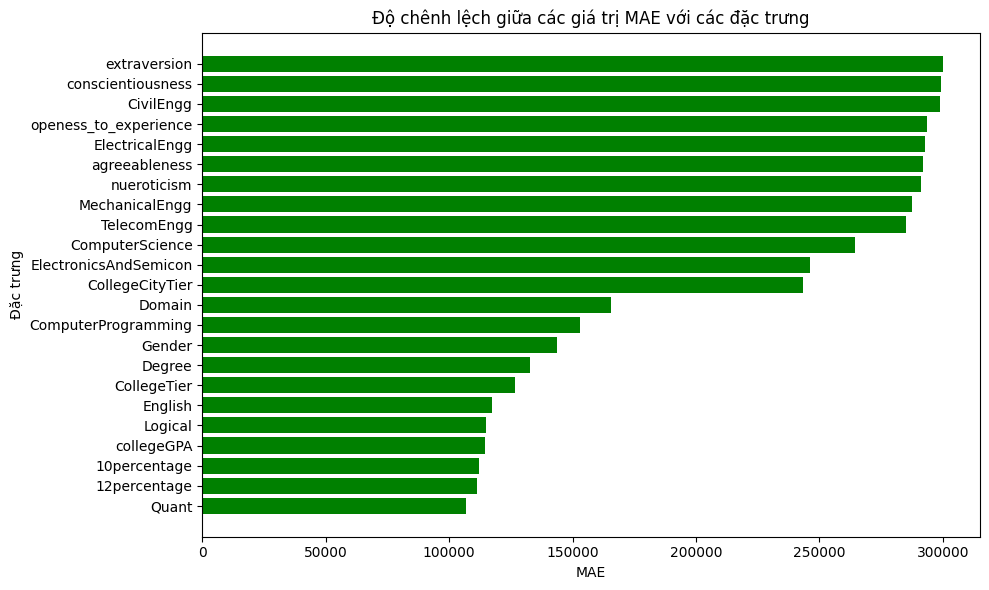

In [318]:
# Tạo DataFrame từ dữ liệu mới
data = {
    'Features': [item[0] for item in feature_mae_1],
    'MAE': [item[1] for item in feature_mae_1]
}
df = pd.DataFrame(data)

# Sắp xếp theo giá trị MAE tăng dần
df = df.sort_values(by='MAE')

# Vẽ biểu đồ độ chênh lệch giữa các giá trị MAE
plt.figure(figsize=(10, 6))
plt.barh(df['Features'], df['MAE'], color='green')
plt.xlabel('MAE')
plt.ylabel('Đặc trưng')
plt.title('Độ chênh lệch giữa các giá trị MAE với các đặc trưng')
plt.tight_layout()
plt.show()


In [319]:
items_model_1=([item[0] for item in feature_mae_1])
#Chuẩn bị bộ dữ liệu
model_1_X_train = np.array(X_train.copy().loc[:, items_model_1])

model_1_X_test = np.array(X_test.copy().loc[:, items_model_1])

#Xây dựng và huấn luyện mô hình theo 23 đặc trưng
lr_model_1=OLSLinearRegression()
lr_model_1.fit(model_1_X_train, Y_train.copy().to_numpy())
# # Dự đoán giá trị mục tiêu trên tập kiểm tra sử dụng đặc trưng tốt nhất
y_pred_model_1 = lr_model_1.predict(model_1_X_test)
mae_model_1 = round(mae(Y_test.copy().to_numpy(), y_pred_model_1),3)
print(f"MAE của mô hình 1: {mae_model_1:.3f}")


MAE của mô hình 1: 101872.211


# MÔ HÌNH 2 (LOẠI VÌ MAE LỚN HƠN CÂU 1A)

In [320]:
model_2 = np.array([feature for feature in train.columns if feature not in ['Salary']])
feature_2,feature_mae_2= [],[]

for i in model_2:
    model_2_X_train = train[i].copy().values.reshape(-1, 1)
    model_2_X_test = test[i].copy().values.reshape(-1, 1)

    lr_model_2 = OLSLinearRegression()
    lr_model_2.fit(model_2_X_train, Y_train.copy())
    y_test_hat_2 = lr_model_2.predict(model_2_X_test)
    mae_f_2 = mae(Y_test.copy(), y_test_hat_2)

    if mae_f_2 <= np.mean([mae_value_1a,mae_best_feature_1b,mae_best_feature_1c]):
        feature_2.append(i)
        feature_mae_2.append((i, mae_f_2))

feature_mae_2 = sorted(feature_mae_2, key=lambda x: x[1])

model2_df = pd.DataFrame(feature_mae_2, columns=['Features', 'MAE'])
model2_df

,Features,MAE
0,Quant,106819.577620
1,12percentage,111427.175482
2,10percentage,111941.803536
3,collegeGPA,114600.224618
4,Logical,115082.021387
5,English,117213.928965
6,CollegeTier,126802.148183
7,Degree,132669.852864
8,Gender,143583.739602
9,ComputerProgramming,153100.424596


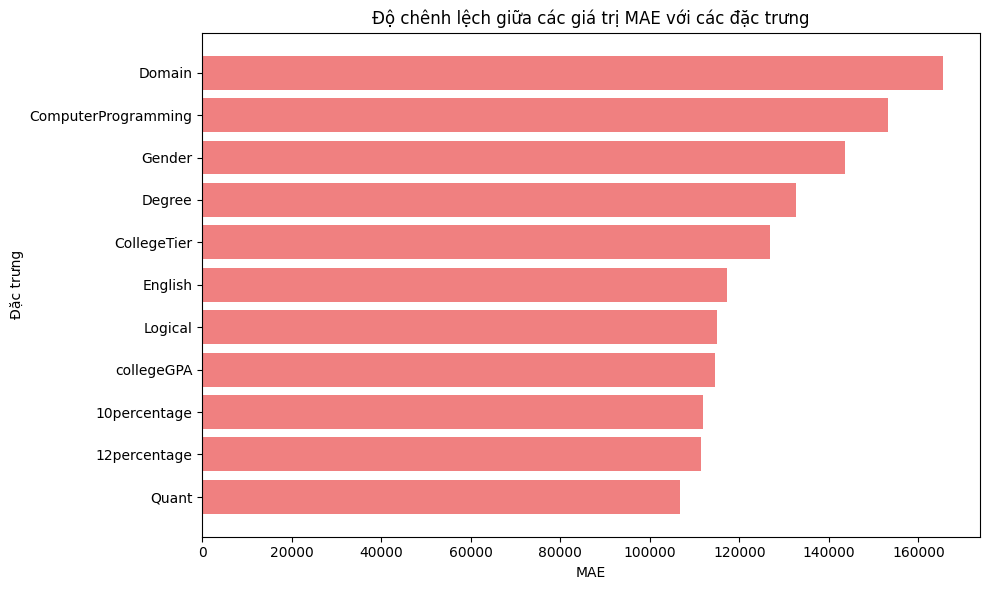

In [321]:
# Tạo DataFrame từ dữ liệu mới
data = {
    'Features': [item[0] for item in feature_mae_2],
    'MAE': [item[1] for item in feature_mae_2]
}
df = pd.DataFrame(data)

# Sắp xếp theo giá trị MAE tăng dần
df = df.sort_values(by='MAE')

# Vẽ biểu đồ độ chênh lệch giữa các giá trị MAE
plt.figure(figsize=(10, 6))
plt.barh(df['Features'], df['MAE'], color='lightcoral')
plt.xlabel('MAE')
plt.ylabel('Đặc trưng')
plt.title('Độ chênh lệch giữa các giá trị MAE với các đặc trưng')
plt.tight_layout()
plt.show()


In [322]:
items_model_2=([item[0] for item in feature_mae_2 if item[0] not in ['CollegeTier','Degree','Gender','ComputerProgramming','Domain']])

model_2_X_train = np.array(X_train.copy().loc[:, items_model_2])

model_2_X_test = np.array(X_test.copy().loc[:, items_model_2])

lr_model_2=OLSLinearRegression()
lr_model_2.fit(model_2_X_train, Y_train.copy().to_numpy())
# # Dự đoán giá trị mục tiêu trên tập kiểm tra sử dụng đặc trưng tốt nhất
y_pred_model_2 = lr_model_2.predict(model_2_X_test)
mae_model_2 = round(mae(Y_test.copy().to_numpy(), y_pred_model_2),3)
print(f"MAE của mô hình 2: {mae_model_2:.3f}")


MAE của mô hình 2: 107971.998


# MÔ HÌNH 3

In [323]:
# Áp dụng biến đổi bình phương cho các đặc trưng
feature_3=([item[0] for item in feature_mae_2 if item[0] not in ['CollegeTier','Degree','Gender']])

model_3_X_train_=np.array(X_train.copy().loc[:, feature_3])
model_3_X_test_=np.array(X_test.copy().loc[:, feature_3])

model_3_X_train = model_3_X_train_**2

# Thêm các biến đặc trưng bình phương vào tập dữ liệu (tức là thay thế dữ liệu cũ)
model_3_X_train_transformed = np.concatenate((model_2_X_train, model_3_X_train), axis=1)

# Xây dựng và huấn luyện mô hình mới với các biến đặc trưng bình phương
lr_model_3 = OLSLinearRegression()
lr_model_3.fit(model_3_X_train_transformed, Y_train.copy())

# Dự đoán trên tập kiểm tra và tính MAE
model_3_X_test = model_3_X_test_**2
model_3_X_test_transformed = np.concatenate((model_2_X_test, model_3_X_test), axis=1)
y_pred_model_3 = lr_model_3.predict(model_3_X_test_transformed)
mae_model_3 = mae(Y_test.copy(), y_pred_model_3)
print(f"MAE của mô hình 3: {mae_model_3:.3f}")




MAE của mô hình 3: 104174.439


# MÔ HÌNH 4 (LOẠI VÌ MAE LỚN HƠN CÂU 1A)

In [324]:
# Áp dụng biến đổi logarithm cho các đặc trưng
feature_4=full
model_4_X_train = np.log(X_train.copy())
# Xây dựng và huấn luyện mô hình với các đặc trưng biến đổi theo log (log ở đây là lnX: loge(X))
lr_model_4 = OLSLinearRegression()
lr_model_4.fit(model_4_X_train, Y_train.copy())

# Áp dụng biến đổi logarithm cho các đặc trưng trên tập kiểm tra
model_4_X_test = np.log(X_test.copy())

# Dự đoán trên tập kiểm tra và tính MAE
y_pred_model_4 = lr_model_4.predict(model_4_X_test)
mae_model_4 = mae(Y_test.copy(), y_pred_model_4)
print(f"MAE của mô hình 4: {mae_model_4:.4f}")


MAE của mô hình 4: 300020.0000


d:\Python\lib\site-packages\pandas\core\internals\blocks.py:329: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
d:\Python\lib\site-packages\pandas\core\internals\blocks.py:329: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)
d:\Python\lib\site-packages\pandas\core\internals\blocks.py:329: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
d:\Python\lib\site-packages\pandas\core\internals\blocks.py:329: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


# MÔ HÌNH 5 (LOẠI VÌ MAE LỚN HƠN CÂU 1A)

https://viblo.asia/p/phan-lop-bang-random-forests-trong-python-djeZ1D2QKWz

In [325]:
# Xây dựng mô hình Random Forest với số cây là 100 và độ sâu tối đa của cây là 10
feature_5=full
model_5 = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=21127099)
# Huấn luyện mô hình
model_5.fit(X_train.copy(), Y_train.copy())

# Dự đoán giá trị trên tập kiểm tra
y_pred_model_5 = model_5.predict(X_test.copy())

# Đánh giá mô hình bằng MAE
mae_model_5 = mae(Y_test.copy(), y_pred_model_5)
print(f"MAE của mô hình 5: {mae_model_5:.3f}")


MAE của mô hình 5: 107493.107


# MÔ HÌNH 6 (LOẠI)
(DÙ MAE NHỎ NHẤT TRONG TẤT CẢ CÁC MÔ HÌNH NHƯNG VÌ KẾT HỢP TỪ CÁC MÔ HÌNH LOẠI NÊN LOẠI MÔ HÌNH 6)

https://www.tma.vn/Hoi-dap/cam-nang-nghe-nghiep/Diem-qua-cac-thuat-toan-Machine-Learning-hien-dai/10097#:~:text=Ensemble,cho%20k%E1%BA%BFt%20qu%E1%BA%A3%20%C4%91%E1%BA%A7u%20ra.

In [326]:

# Tạo mô hình kết hợp bằng cách lấy trung bình của dự đoán từ 7 mô hình
y_pred_model_6=(y_pred_1a+y_personality_best_feature+y_skill_best_feature+y_pred_model_1+y_pred_model_2+y_pred_model_3+y_pred_model_5)/7
y_pred_model_6=np.array(y_pred_model_6)
# Đánh giá mô hình kết hợp bằng MAE
mae_model_6 = mae(Y_test.copy(), y_pred_model_6)
print(f"MAE của mô hình kết hợp: {mae_model_6:.3f}")


MAE của mô hình kết hợp: 101064.851


# MÔ HÌNH 7 (LOẠI VÌ MAE LỚN HƠN CÂU 1A VÀ TRÙNG SỐ THUỘC TÍNH CÂU 1A)

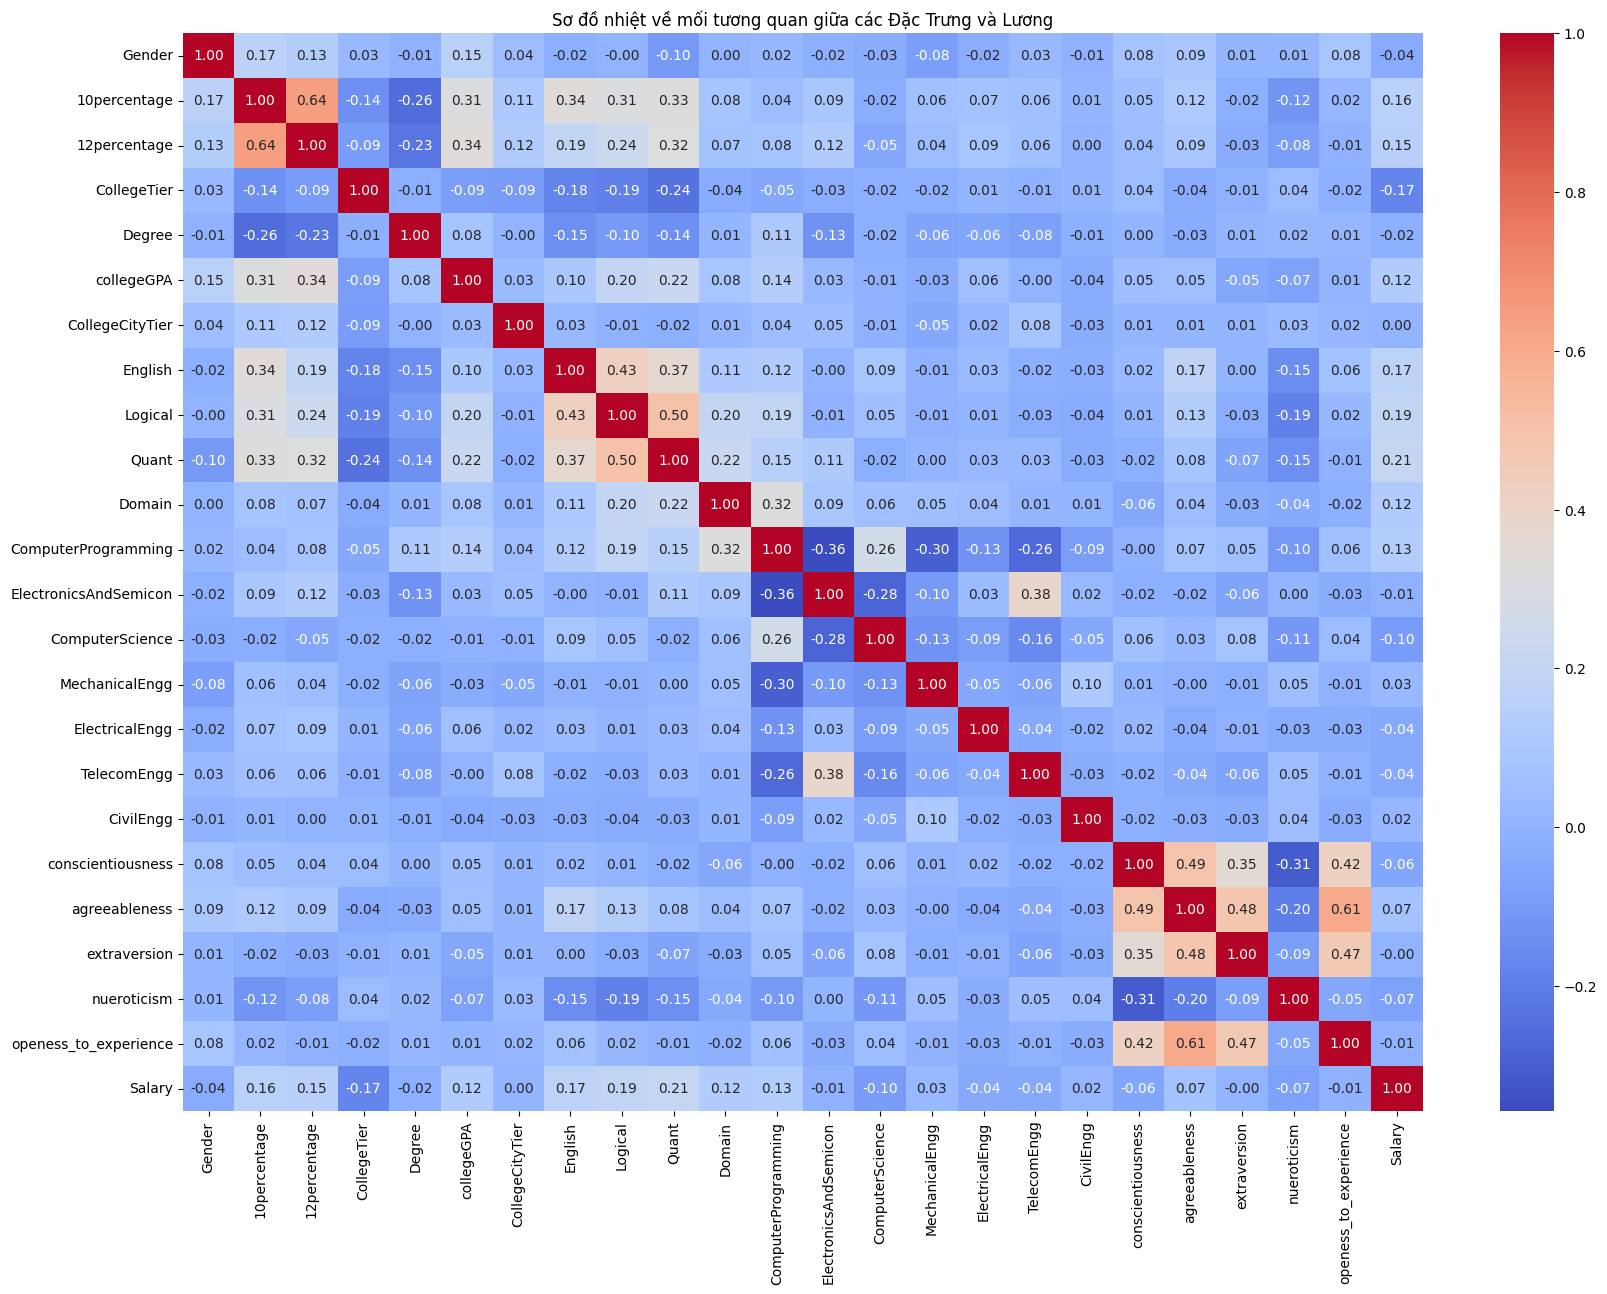

In [327]:
# Tạo ma trận tương quan giữa các đặc trưng và biến mục tiêu
correlation_matrix = np.corrcoef(X_train.T, Y_train)

# Tạo heatmap từ ma trận tương quan
plt.figure(figsize=(20, 14))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', xticklabels=full, yticklabels=full)
plt.title('Sơ đồ nhiệt về mối tương quan giữa các Đặc Trưng và Lương')
plt.show()

In [328]:
items_model_7=['10percentage','12percentage','collegeGPA','English','Logical','Quant','Domain','ComputerProgramming','MechanicalEngg','CivilEngg','agreeableness']
feature_7=items_model_7
model_7_X_train = np.array(X_train.copy().loc[:, items_model_7])

model_7_X_test = np.array(X_test.copy().loc[:, items_model_7])

lr_model_7=OLSLinearRegression()
lr_model_7.fit(model_7_X_train, Y_train.copy().to_numpy())
# # Dự đoán giá trị mục tiêu trên tập kiểm tra sử dụng đặc trưng tốt nhất
y_pred_model_7 = lr_model_7.predict(model_7_X_test)
mae_model_7 = round(mae(Y_test.copy().to_numpy(), y_pred_model_7),3)
print(f"MAE của mô hình 7: {mae_model_7:.3f}")

MAE của mô hình 7: 106446.915


# MÔ HÌNH 8

In [329]:
# Áp dụng biến đổi lập phương cho các đặc trưng
feature_8=items_model_7
model_8_X_train = model_7_X_train**3

# Thêm các biến đặc trưng lập phương vào tập dữ liệu (tức là thay thế dữ liệu cũ)
model_8_X_train_transformed = np.concatenate((model_7_X_train, model_8_X_train), axis=1)

# Xây dựng và huấn luyện mô hình mới với các biến đặc trưng lập phương 
lr_model_8 = OLSLinearRegression()
lr_model_8.fit(model_8_X_train_transformed, Y_train.copy())

# Dự đoán trên tập kiểm tra và tính MAE
model_8_X_test = model_7_X_test**3
model_8_X_test_transformed = np.concatenate((model_7_X_test, model_8_X_test), axis=1)
y_pred_model_8 = lr_model_8.predict(model_8_X_test_transformed)
mae_model_8 = mae(Y_test.copy(), y_pred_model_8)
print(f"MAE của mô hình 8: {mae_model_8:.3f}")


MAE của mô hình 8: 103288.616


# MÔ HÌNH 9 (LOẠI VÌ MAE LỚN HƠN CÂU 1A)

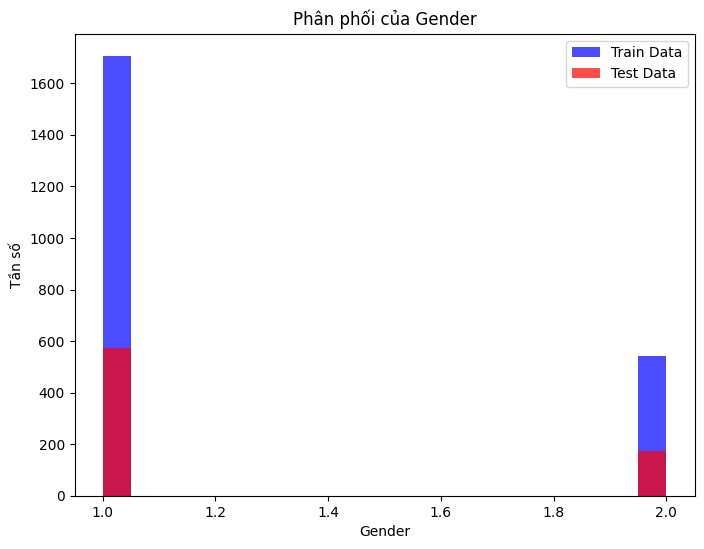

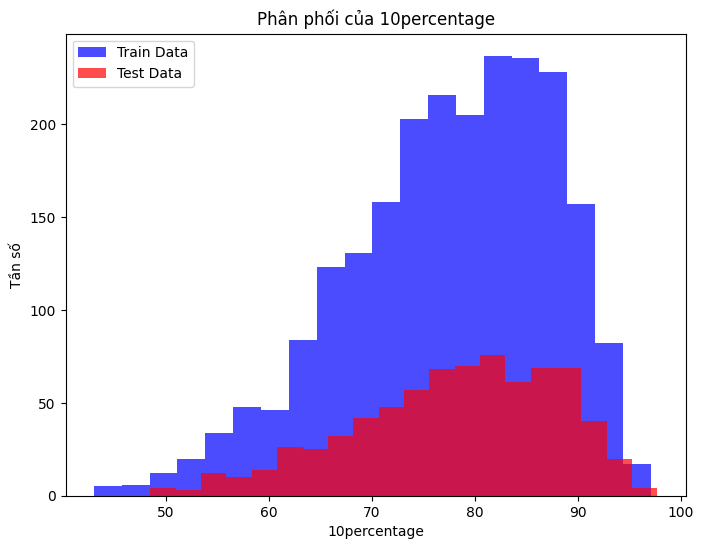

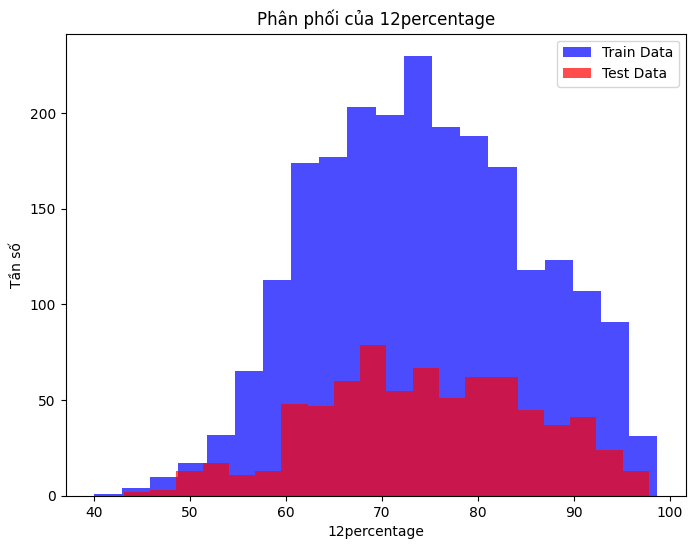

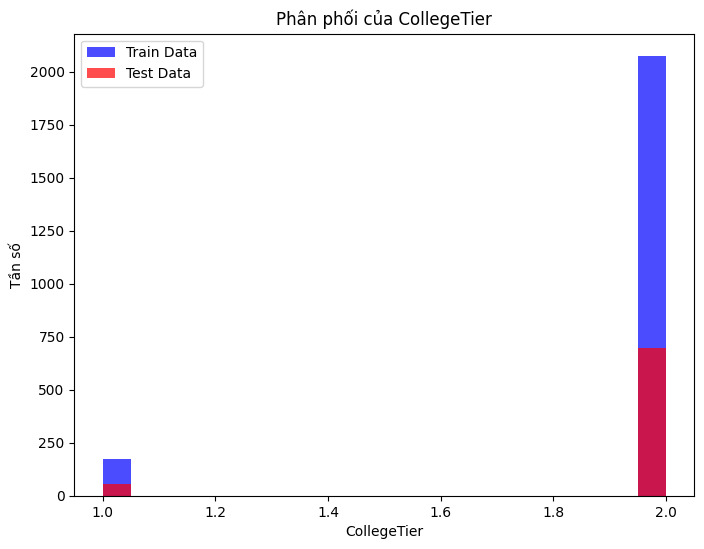

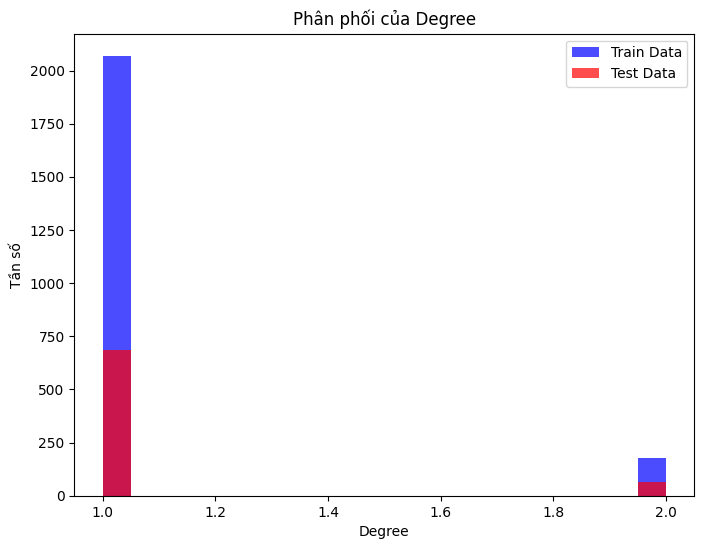

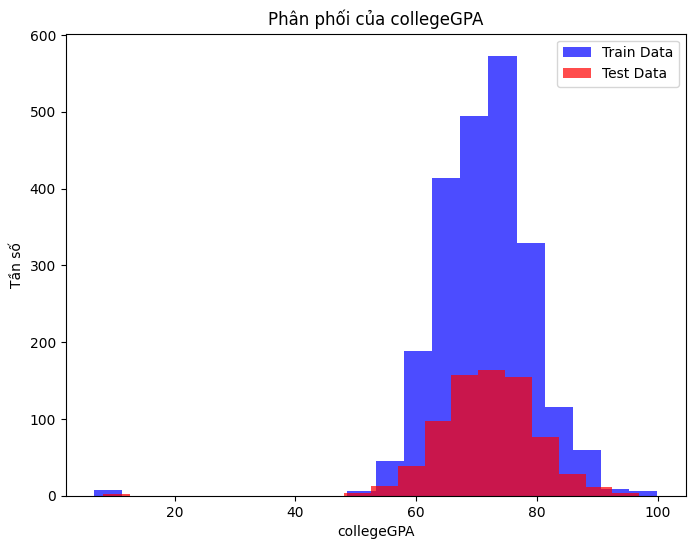

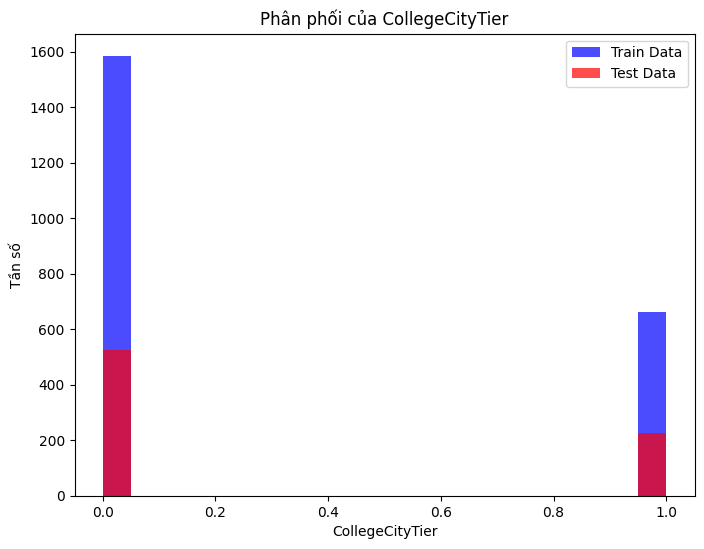

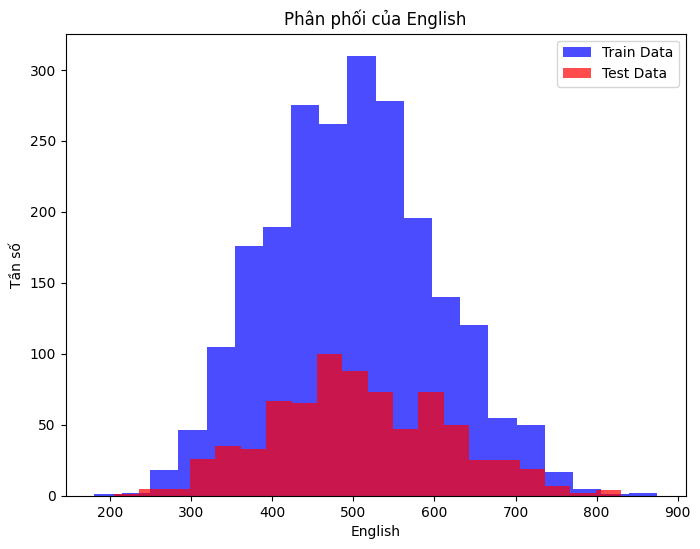

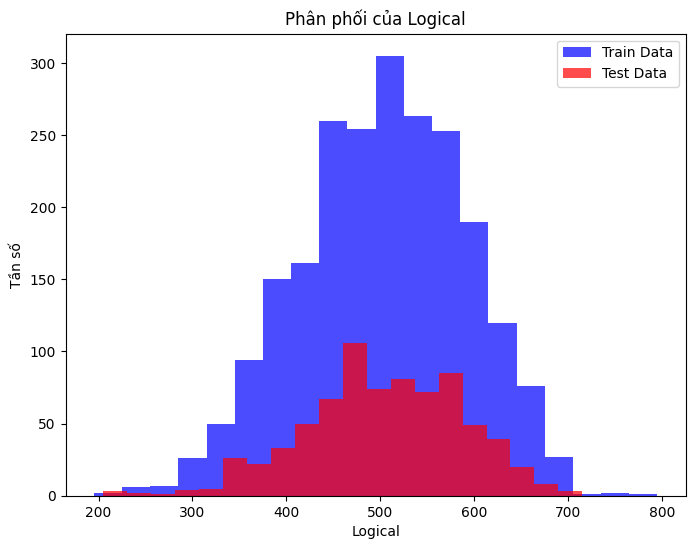

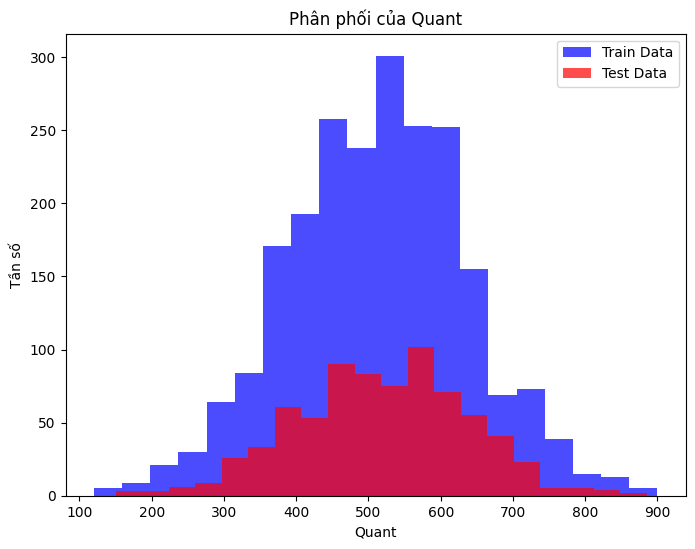

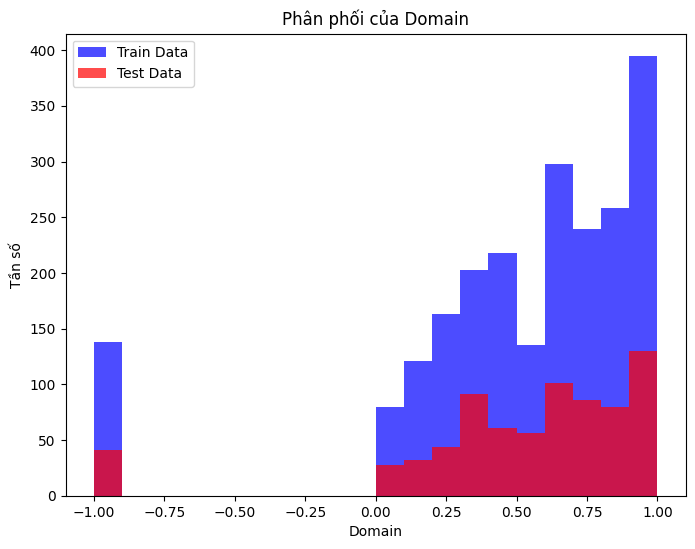

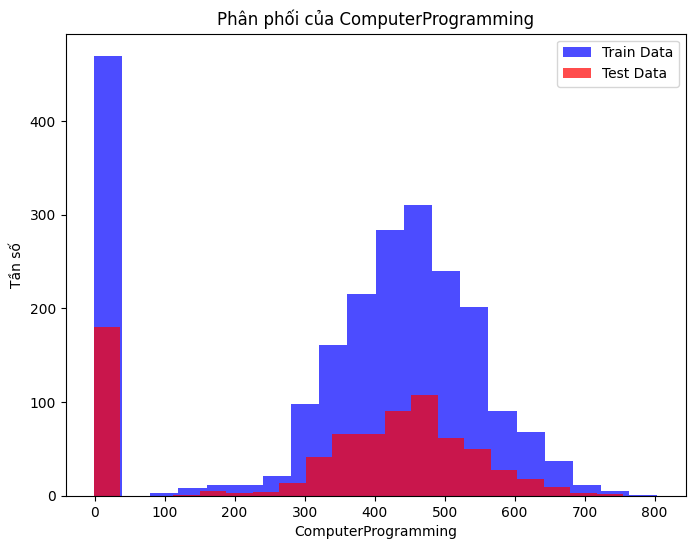

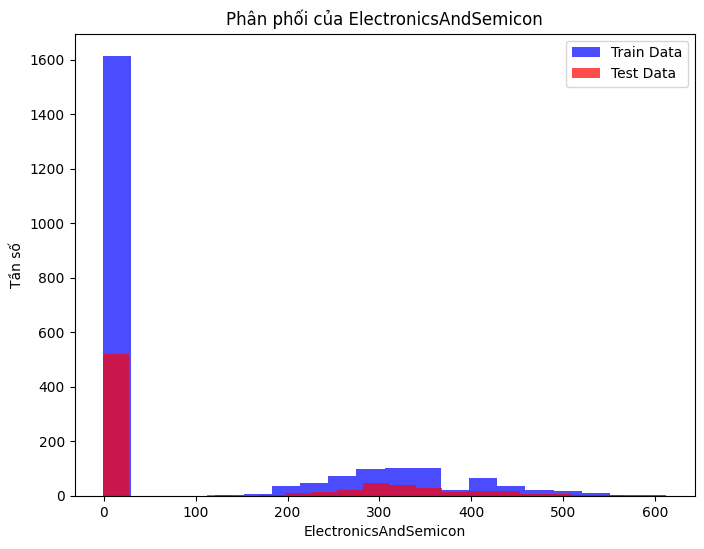

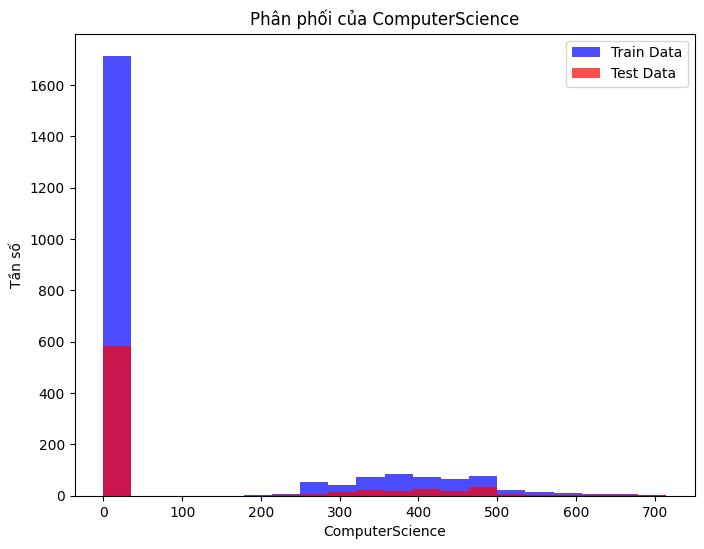

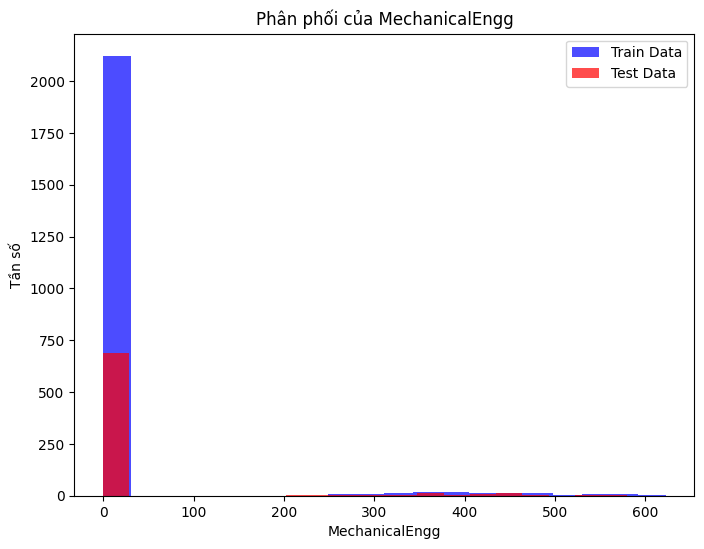

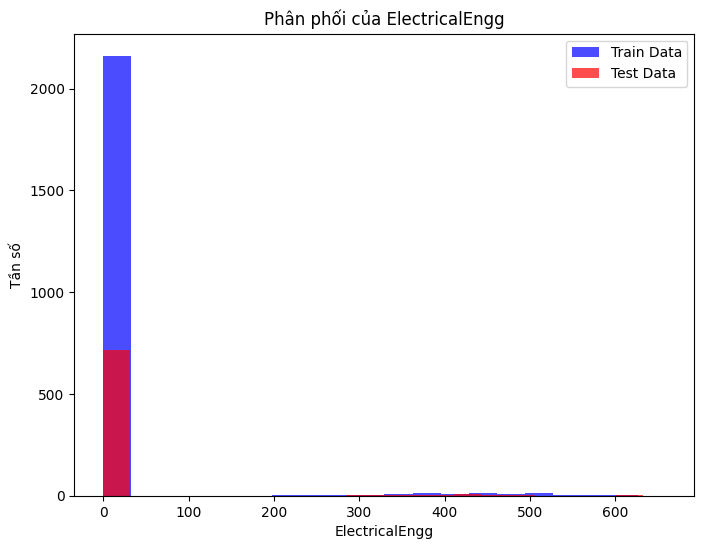

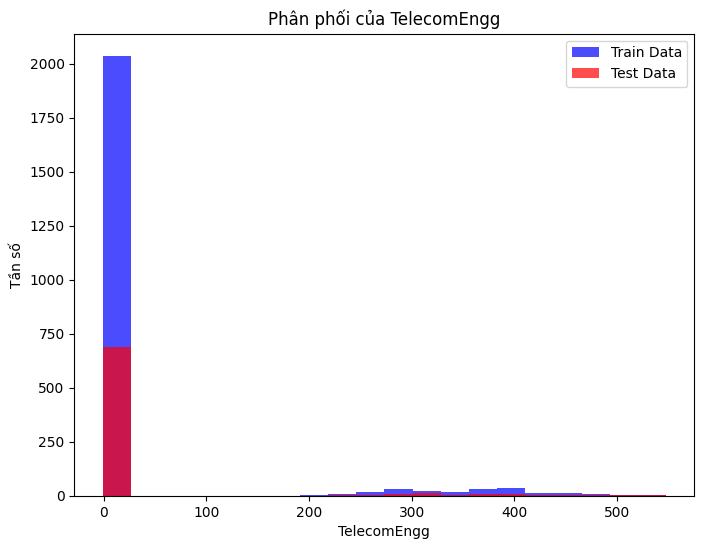

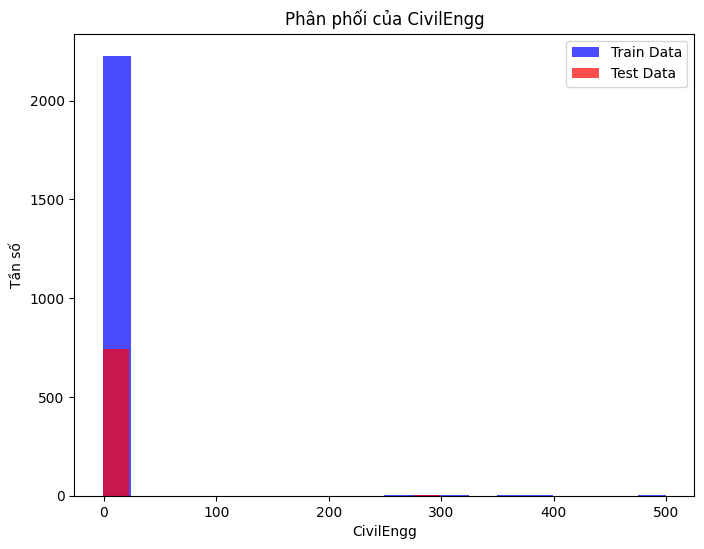

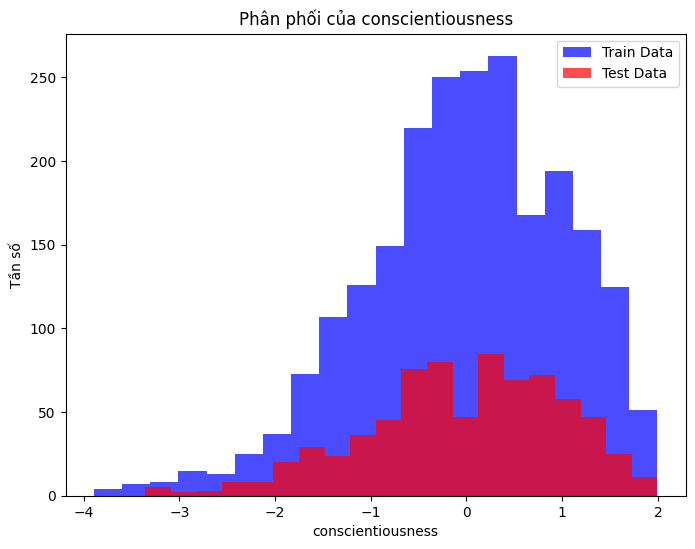

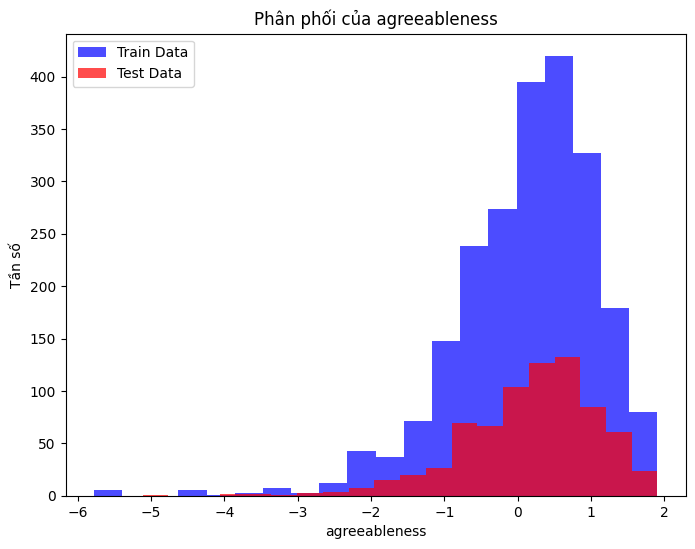

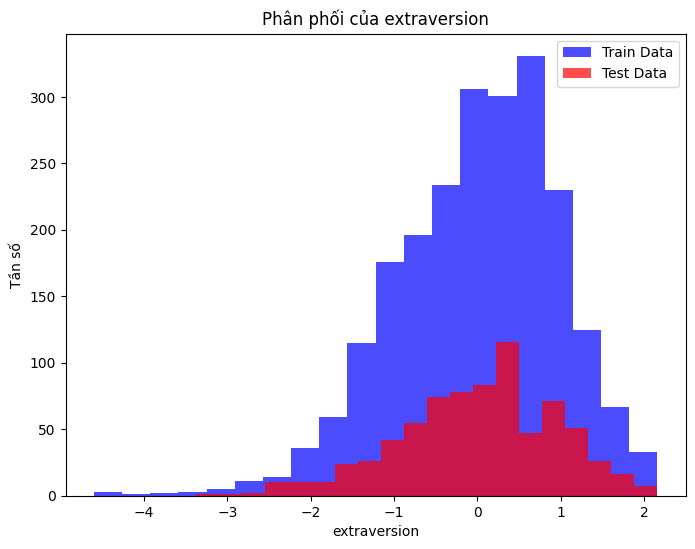

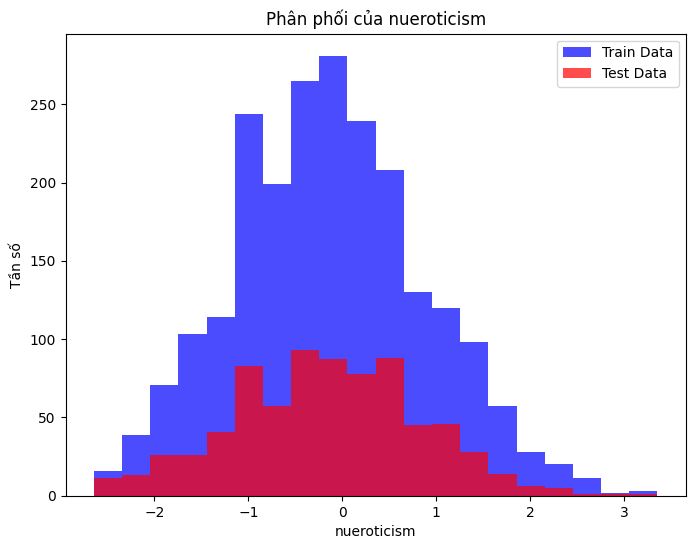

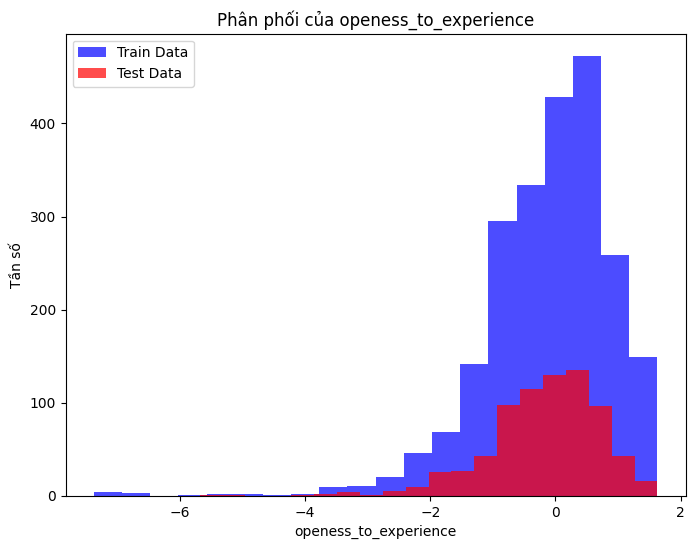

In [330]:
# Lặp qua từng đặc trưng
for column in train.columns:
    if column != 'Salary':
        plt.figure(figsize=(8, 6))
        plt.hist(train[column], bins=20, color='blue', alpha=0.7, label='Train Data')
        plt.hist(test[column], bins=20, color='red', alpha=0.7, label='Test Data')
        plt.title(f'Phân phối của {column}')
        plt.xlabel(column)
        plt.ylabel('Tần số')
        plt.legend()
        plt.show()


In [331]:
items_model_9=['10percentage','12percentage','collegeGPA','English','Logical','Quant','Domain','ComputerProgramming','conscientiousness','agreeableness','extraversion','nueroticism','openess_to_experience']
feature_9=items_model_9
model_9_X_train = np.array(X_train.copy().loc[:, items_model_9])

model_9_X_test = np.array(X_test.copy().loc[:, items_model_9])

lr=OLSLinearRegression()
lr.fit(model_9_X_train, Y_train.copy().to_numpy())
# # Dự đoán giá trị mục tiêu trên tập kiểm tra sử dụng đặc trưng tốt nhất
y_pred_model_9 = lr.predict(model_9_X_test)
mae_model_9 = round(mae(Y_test.copy().to_numpy(), y_pred_model_9),3)
print(f"MAE của mô hình 9: {mae_model_9:.3f}")

MAE của mô hình 9: 106848.357


## Thử nghiệm, so sánh các mô hình

In [332]:
# Phần code cho yêu cầu 1d
# Tìm ra mô hình tốt nhất (tự thiết kế bởi sinh viên)
# In ra các kết quả cross-validation như yêu cầu

# Các model đã tìm được
top_model = [feature_1,feature_3,feature_8]
model_ = ["Mô hình 1","Mô hình 3","Mô hình 8"]

# Số lượng lần permute (k) cho cross-validation
k = 5

# Tổng số mẫu trong tập dữ liệu
total_samples = len(train)

# Khởi tạo mảng để lưu trung bình MAE của các mô hình
mae_results = np.zeros(len(top_model))

# Lặp qua từng lần permute để thực hiện cross-validation
for _ in range(k):
    # Tạo ngẫu nhiên chỉ số cho tập train và test
    permuted_indices = np.random.RandomState(seed=1).permutation(total_samples)
    train_indices = permuted_indices[:total_samples // 2]
    test_indices = permuted_indices[total_samples // 2:]
    
    train_set_permuted = train.iloc[train_indices]
    test_set_permuted = train.iloc[test_indices]
    
    X_train_permuted = [train_set_permuted.loc[:, model] for model in top_model]
    X_test_permuted = [test_set_permuted.loc[:, model] for model in top_model]
    y_train_permuted, y_test_permuted = train_set_permuted['Salary'], test_set_permuted['Salary']

    mae_list = []
    for i, j in zip(X_train_permuted, X_test_permuted):
        lr = OLSLinearRegression()
        lr.fit(i, y_train_permuted)
        y_pred_ = lr.predict(j)
        mae_list.append(mae(y_test_permuted, y_pred_))
    
    mae_results = np.add(mae_results, mae_list)

mae_results /= k

# Chọn mô hình có MAE thấp nhất
best_feature_idx_model = np.argmin(mae_results)
best_model, best_mae_model = top_model[best_feature_idx_model], mae_results[best_feature_idx_model]

print(f"Mô hình tốt nhất là {model_[best_feature_idx_model]} với MAE tương ứng là: {best_mae_model:.3f}")

# Tạo DataFrame để hiển thị kết quả MAE
pd.set_option('display.max_colwidth', 1000)
table = [[name, feature, mae] for name, feature, mae in zip(model_, top_model, mae_results)]

mae_df = pd.DataFrame(table, columns=['Mô hình','Đặc trưng', 'MAE'])
mae_df


Mô hình tốt nhất là Mô hình 1 với MAE tương ứng là: 110265.346


,Mô hình,Đặc trưng,MAE
0,Mô hình 1,"[Gender, 10percentage, 12percentage, CollegeTier, Degree, collegeGPA, CollegeCityTier, English, Logical, Quant, Domain, ComputerProgramming, ElectronicsAndSemicon, ComputerScience, MechanicalEngg, ElectricalEngg, TelecomEngg, CivilEngg, conscientiousness, agreeableness, extraversion, nueroticism, openess_to_experience]",110265.345965
1,Mô hình 3,"[Quant, 12percentage, 10percentage, collegeGPA, Logical, English, ComputerProgramming, Domain]",113855.438962
2,Mô hình 8,"[10percentage, 12percentage, collegeGPA, English, Logical, Quant, Domain, ComputerProgramming, MechanicalEngg, CivilEngg, agreeableness]",113803.205968


In [333]:
# Huấn luyện lại mô hình my_best_model trên toàn bộ tập huấn luyện
x_train_best_model = train.loc[:, best_model]
y_train_best_model = train.iloc[:, -1]

x_test_best_model = test.loc[:, best_model]
y_test_best_model = test.iloc[:, -1]

my_best_model = OLSLinearRegression()
my_best_model.fit(x_train_best_model, y_train_best_model)
# # Dự đoán giá trị mục tiêu trên tập kiểm tra sử dụng đặc trưng tốt nhất
y_pred_best_model = my_best_model.predict(x_test_best_model)

In [334]:
# Gọi hàm MAE (tự cài đặt hoặc từ thư viện) trên tập kiểm tra với mô hình my_best_model
mae_best_feature_1d = round(mae(y_pred_best_model, y_test_best_model),3)
print(f"MAE trên đặc trưng tốt nhất sau khi train lại: {mae_best_feature_1d:.3f}")

# Thể hiện công thức mô hình hồi quy
coef=my_best_model.get_params()
w = "Salary = {:.3f}*{}".format(coef[0],feature_1[0])  # w0
for i, coef in enumerate(coef[1:], start=1):
    w += " + {:.3f}*{}".format(coef, feature_1[i])
print(w)

MAE trên đặc trưng tốt nhất sau khi train lại: 101872.211
Salary = -23874.542*Gender + 898.576*10percentage + 1203.496*12percentage + -83592.388*CollegeTier + 11515.431*Degree + 1626.519*collegeGPA + -5717.734*CollegeCityTier + 153.435*English + 120.511*Logical + 102.581*Quant + 27939.640*Domain + 76.730*ComputerProgramming + -47.747*ElectronicsAndSemicon + -177.388*ComputerScience + 33.933*MechanicalEngg + -151.471*ElectricalEngg + -64.198*TelecomEngg + 145.895*CivilEngg + -19814.830*conscientiousness + 15503.267*agreeableness + 4908.582*extraversion + -10661.029*nueroticism + -5815.021*openess_to_experience


Công thức hồi quy (phần trọng số làm tròn đến 3 chữ số thập phân, ví dụ 0.012345 $\to$ 0.012)

$$\text{Salary} = -23874.542 \times Gender + 898.576 \times 10percentage + 1203.496 \times 12percentage - 83592.388 \times CollegeTier + 11515.431 \times Degree + 1626.519 \times collegeGPA - 5717.734 \times CollegeCityTier + 153.435 \times English + 120.511 \times Logical + 102.581 \times Quant + 27939.640 \times Domain + 76.730 \times ComputerProgramming - 47.747 \times ElectronicsAndSemicon - 177.388 \times ComputerScience + 33.933 \times MechanicalEngg - 151.471 \times ElectricalEngg - 64.198 \times TelecomEngg + 145.895 \times CivilEngg - 19814.830 \times conscientiousness + 15503.267 \times agreeableness + 4908.582 \times extraversion - 10661.029 \times nueroticism - 5815.021 \times openess_to_experience
$$